In [1]:
import os   #gpu추가
import tensorflow as tf 
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

In [2]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

6010


c:\Users\gpwns\anaconda3\envs\engpu\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


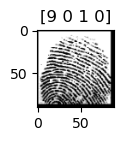

In [3]:
img_list = sorted(glob.glob('Dataimg/Real/*.BMP'))#파일경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)#원래 (len(이하동일),96, 96)이었음
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (90, 90))   #원래 96이었음
    imgs[i, :, :,0] = img               #imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)

np.savez('dataset/x_real.npz',data=imgs)     #npz로 파일 저장해야해서 수정4/28 일단 추가 argument넣지 않고 npz로 저장해봄
np.save('dataset/y_real.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17931


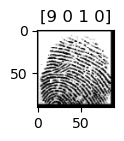

In [4]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Easy/*.BMP'))      #파일 경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)         #변경
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (90, 90))     #변경
    imgs[i, :, :, 0] = img              #변경
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)


np.savez('dataset/x_easy.npz',data=imgs)         #npz로 파일 저장해야해서 수정
np.save('dataset/y_easy.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17067


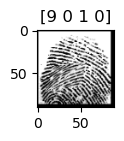

In [5]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Medium/*.BMP'))#파일 경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (90, 90))
    imgs[i, :, :, 0] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_medium.npz', data = imgs)       #npz로 파일 저장해야해서 수정
np.save('dataset/y_medium.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

14272


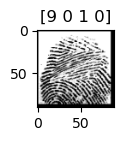

In [6]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Hard/*.BMP'))#경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (90, 90))
    imgs[i, :, :, 0] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_hard.npz', data=imgs)             #npz로 파일 저장해야해서 수정
np.save('dataset/y_hard.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')